In [1]:
import pandas as pd
import json

df_data = pd.read_csv("../full_analysis/all_data_merge.csv")

In [2]:
count_null_values = []

for column in df_data.columns:
    data_columns = df_data[column].isna()

    count=0

    for element in data_columns:
        if element == True:
            count+=1
    percentage = count*100/len(df_data)

    row = [column, count, percentage]

    count_null_values.append(row)

df_counts = pd.DataFrame(count_null_values, columns=['column', 'null', 'null_percentage'])
df_counts = df_counts.sort_values(by=['null_percentage'], ascending=False)
df_counts

,column,null,null_percentage
307,ASQ_6_15,34,97.142857
311,ASQ_6_19,34,97.142857
66,relative_8_educational_level,34,97.142857
65,relativa_8_occupation,34,97.142857
64,relative_8_marital_status,34,97.142857
...,...,...,...
142,ADS_CHILD_TA_2,0,0.000000
141,ADS_CHILD_TA,0,0.000000
140,ADS_CHILD_V,0,0.000000
139,ADS_CHILD_M_2,0,0.000000


In [3]:
df_counts.describe()

,null,null_percentage
count,380.000000,380.000000
mean,7.268421,20.766917
std,11.337776,32.393647
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,10.000000,28.571429
max,34.000000,97.142857


<AxesSubplot: xlabel='null_percentage'>

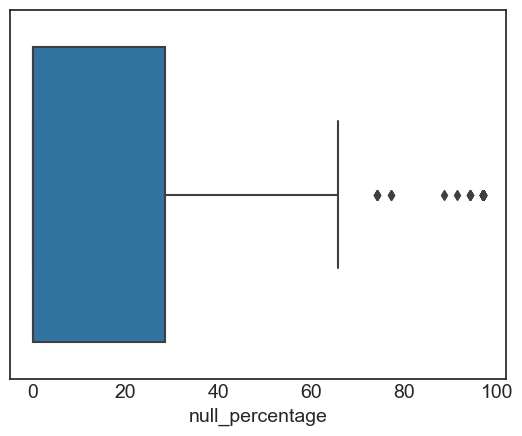

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 14})

sns.boxplot(x=df_counts['null_percentage'])

In [5]:
columns_with_null_values = []

for index in df_counts.index:
    if df_counts['null_percentage'][index]> 28.571429:#esto es el q3
        columns_with_null_values.append(df_counts['column'][index])

In [6]:
columns_with_id = ['id_name', 'm1', 'm2', 'm3', 'm4']

In [7]:
non_informative_columns = []

for column in df_data.columns:
    if column not in columns_with_id:
        unique_values = df_data[column].unique()

        if len(unique_values) == 1 or len(unique_values) == len(df_data):
            non_informative_columns.append(column)

In [9]:
columns_to_filter = columns_with_null_values + non_informative_columns
columns_to_filter.append('id_name')

df_ignored_columns = df_data[columns_to_filter]

df_measures = [['id_name', 'm1', 'm2', 'm3', 'm4']]

columns_to_use = [column for column in df_data.columns if column not in columns_to_filter and column not in columns_with_id]
columns_to_use.append('id_name')

df_with_values_to_cluster = df_data[columns_to_use]


In [10]:
df_with_values_to_cluster.to_csv("../full_analysis/data_with_values_to_use.csv", index=False)

In [11]:
def check_proportions(name_column, dataset):

    unique_values = dataset[name_column].unique()
    dict_values = {}

    for value in unique_values:
        filter_data = dataset.loc[dataset[name_column] == value]
        dict_values.update({str(value) : len(filter_data)})
    dict_response = {name_column: dict_values}
    return dict_response, len(unique_values)

In [14]:
distribution_len_unique = []

dict_values_proportions = []

for column in df_with_values_to_cluster.columns:
    dict_proportion, len_unique = check_proportions(column, df_with_values_to_cluster)
    dict_values_proportions.append(dict_proportion)
    distribution_len_unique.append(len_unique)

dict_values_proportions


[{'BienestarV1': {'5.0': 8, 'nan': 0, '4.0': 20, '3.0': 3}},
 {'BienestarV2': {'4.0': 24, 'nan': 0, '5.0': 5, '3.0': 2}},
 {'BienestarAv': {'4.5': 7, 'nan': 0, '4.0': 19, '5.0': 2, '3.5': 3}},
 {'Género_bebé': {'1': 15, '0': 20}},
 {'Edad_bebé_1': {'5': 2,
   '10': 6,
   '12': 4,
   '8': 4,
   '11': 3,
   '13': 1,
   '6': 2,
   '14': 2,
   '7': 4,
   '9': 6,
   '3': 1}},
 {'Etnia_bebé': {'1': 13, '0': 22}},
 {'Grupo_étnico_bebé': {'4': 12, '0': 22, '10': 1}},
 {'Cuidado_alt_previo': {'0': 34, '1': 1}},
 {'Razón_entrada_SC': {'1': 20,
   '7': 4,
   '3': 1,
   '4': 2,
   '5': 6,
   '6': 1,
   '2': 1}},
 {'Jornada_SalaC': {'3': 31, '1': 4}},
 {'Otro_cuidado': {'1': 10, '0': 25}},
 {'Tipo_cuidado_alt': {'1': 6, '0': 25, '2': 3, '3': 1}},
 {'Relación_cuidador_bebé': {'1': 34, '5': 1}},
 {'Edad_cuidador_1': {'22': 1,
   '33': 3,
   '19': 2,
   '26': 3,
   '24': 4,
   '58': 1,
   '30': 2,
   '29': 1,
   '17': 2,
   '27': 3,
   '36': 3,
   '25': 3,
   '18': 2,
   '41': 1,
   '34': 1,
   '38': 

In [69]:
with open("../raw_data_spss/desc_columns.json", 'r', encoding="utf-8") as doc_open:
    data_description = json.load(doc_open)

In [70]:
def search_colum_in_dict(name_key, dict_values):
    response = None
    stop_condition = 0

    for element in dict_values:
        if stop_condition == 1:
            break

        for key in element:
            if key == name_key:
                response = element[key]
                stop_condition = 1
                break

    return response    

In [24]:
for element in data_description:
    for key in element:
        print(key)
    break

Observador_1


In [72]:
columns_with_none = []

for column in df_with_values_to_cluster.columns:
    if column not in ['id_name', 'm1', 'm2', 'm3', 'm4', 'N°_diada', 'Fe']:
        value_response = search_colum_in_dict(column, data_description)
        if value_response == None:
            columns_with_none.append(column)

len(columns_with_none)

153